In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt 
from matplotlib import style

%matplotlib inline

In [4]:
import re 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings # importing warnings 
warnings.filterwarnings("ignore") #excluding warning signs to display
pd.set_option("display.max_colwidth", 200)

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [28]:
data = pd.read_csv(r"C:\Users\WINDOWS 10\Data Science with Python\Comcast_telecom_complaints_data.csv",index_col=0, parse_dates=[2,3])
data.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Ticket #,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
277946,Comcast Imposed a New Usage Cap of 300GB that punishes streaming.,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [29]:
rows, columns = data.shape
print('Rows=',rows,'Columns=',columns )

Rows= 2224 Columns= 10


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Customer Complaint           2224 non-null   object        
 1   Date                         2224 non-null   datetime64[ns]
 2   Date_month_year              2224 non-null   datetime64[ns]
 3   Time                         2224 non-null   object        
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 191.1+ KB


In [31]:
data.isna().sum()

Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [32]:
data.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [33]:
duplicate = data[data.duplicated(keep = 'last')]
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [Customer Complaint, Date, Date_month_year, Time, Received Via, City, State, Zip code, Status, Filing on Behalf of Someone]
Index: []


## Trend Chart of complaints based on Date of the month

In [34]:
import datetime
from dateutil.parser import parse 
import pytz 

In [36]:
data['Date of the Month'] = data['Date_month_year'].apply(lambda d: d.day)
dm = data['Customer Complaint'].groupby(data['Date of the Month']).count().reset_index()
dm

,Date of the Month,Customer Complaint
0,4,206
1,5,131
2,6,272
3,13,68
4,14,54
5,15,58
6,16,65
7,17,60
8,18,69
9,19,50


<Figure size 1500x800 with 0 Axes>

<BarContainer object of 22 artists>

Text(0.5, 0, 'Date of the month')

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

Text(0, 0.5, 'No. of Complaints')

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

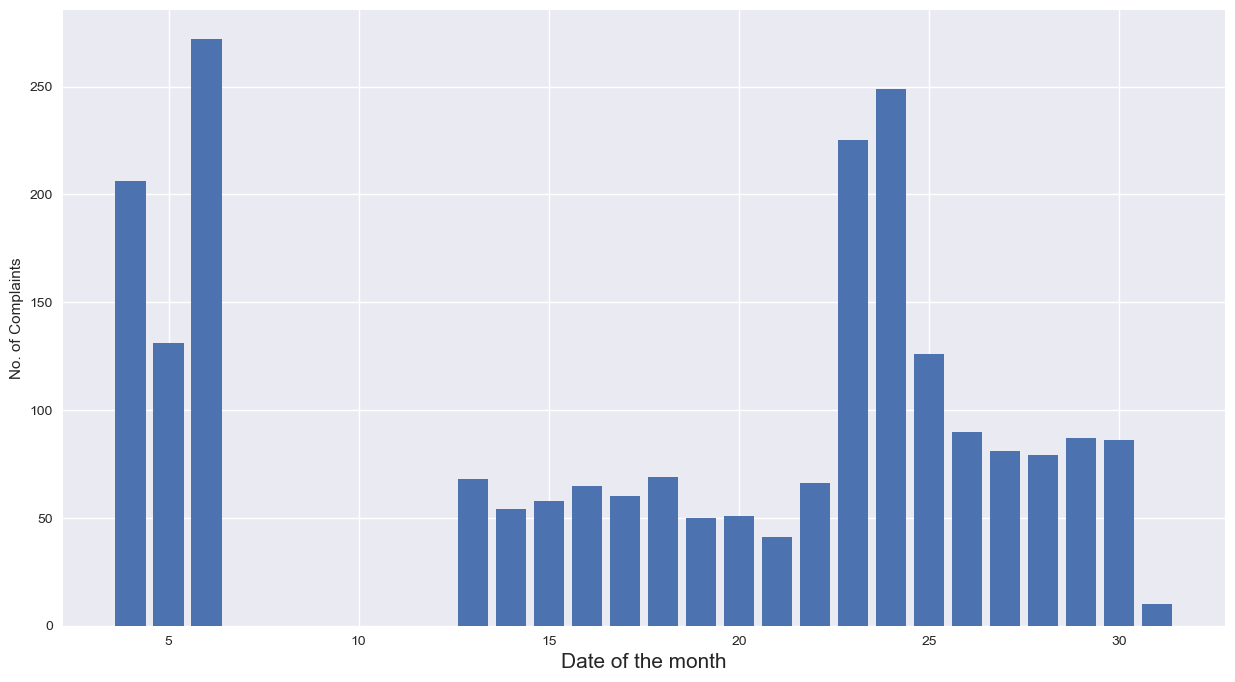

In [39]:
#Creating Trend Chart
plt.style.use('seaborn')
plt.figure(figsize =(15, 8))
plt.bar(dm["Date of the Month"],dm["Customer Complaint"])
plt.xlabel("Date of the month",fontsize=15)
plt.xticks(rotation=0,fontsize=10)
plt.ylabel("No. of Complaints")
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.title("Frequency of Complaints based on Date of any Month",fontsize=20)
plt.show()

Insight: 
Highest number of complaints occured on 6th based on total data. 

## Trend chart of complaints based on month

In [40]:
#month wise data table
s = data.groupby(pd.Grouper(key='Date_month_year',freq='M')).count()['Customer Complaint'].reset_index() 
#grouped customer complaints data using Date_month_year column by month order and reset the index. 
#i.e, removed Date_month_year as index and made it to a column
s['month'] = s['Date_month_year'].dt.strftime('%B') #Created month column from Date_month_year

s.drop(['Date_month_year'], axis='columns', inplace=True) #Dropped Date_month_year
s

,Customer Complaint,month
0,55,January
1,59,February
2,45,March
3,375,April
4,317,May
5,1046,June
6,49,July
7,67,August
8,55,September
9,53,October


<Figure size 1500x800 with 0 Axes>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'No. of Complaints')

Text(0.5, 1.0, 'Monthwise customer complaints')

Text(March, 900, '1046 complaints in June')

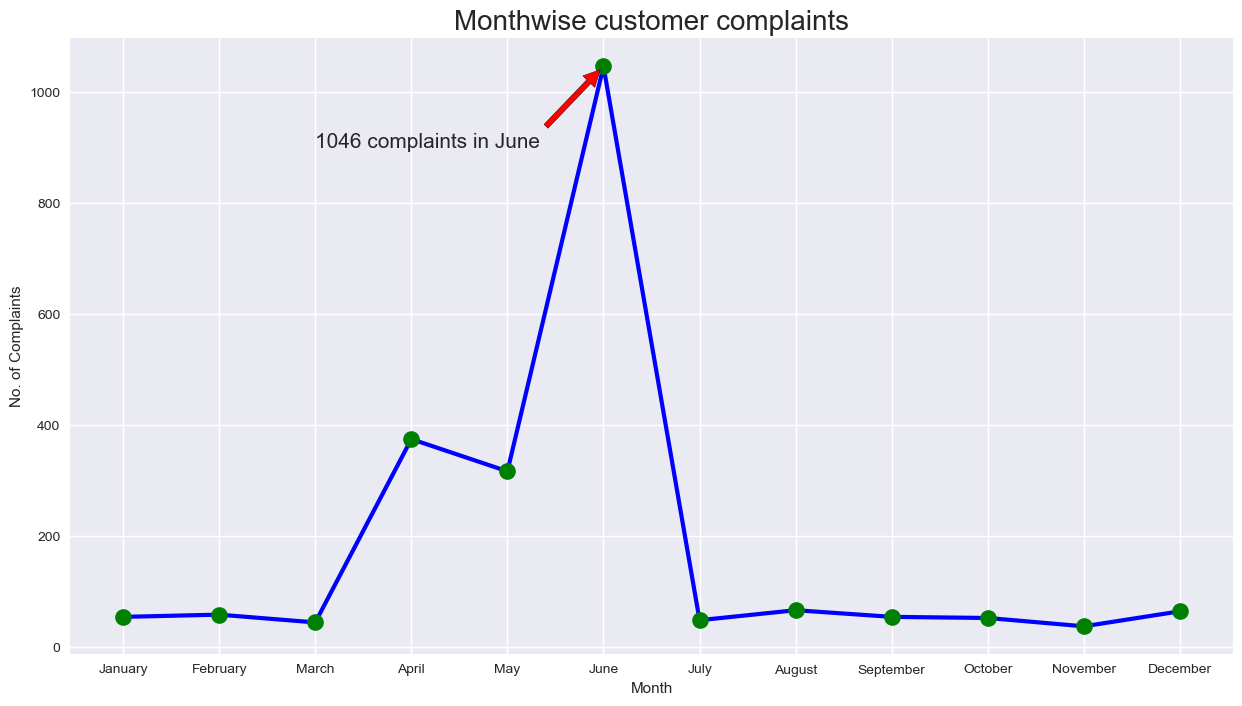

In [41]:
#Creating Trend Chart
plt.style.use('seaborn')
plt.figure(figsize=(15,8))
plt.plot(s['month'],s['Customer Complaint'] , color='blue', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=12)
plt.xlabel("Month")  # add X-axis label
plt.ylabel("No. of Complaints")  # add Y-axis label
plt.title("Monthwise customer complaints",fontsize=20)  # add title
plt.annotate('1046 complaints in June', xy =('June', 1046),xytext =('March', 900),arrowprops = dict(facecolor ='red', shrink = 0.05),fontsize=15)
plt.show()

Observation: June has highest number of complaints

##  Trend chart of complaints based on weekday of the year

In [42]:
#weekwise data table
data['day_of_week'] = data['Date_month_year'].dt.day_name() #Creating a Weekday Column
w= data['day_of_week'].value_counts(sort=False).reset_index()
w.columns = ['Day of Week', 'Complaints Count']
w

,Day of Week,Complaints Count
0,Wednesday,441
1,Tuesday,464
2,Saturday,214
3,Sunday,228
4,Friday,290
5,Thursday,331
6,Monday,256


In [43]:
#Mapped weekdays as per order
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = w['Day of Week'].map(mapping)
key
w = w.iloc[key.argsort()].set_index('Day of Week')
print(w)

0    2
1    1
2    5
3    6
4    4
5    3
6    0
Name: Day of Week, dtype: int64

             Complaints Count
Day of Week                  
Monday                    256
Tuesday                   464
Wednesday                 441
Thursday                  331
Friday                    290
Saturday                  214
Sunday                    228


<Figure size 1500x800 with 0 Axes>

<Axes: xlabel='Day of Week'>

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'No. of Complaints')

Text(0.5, 1.0, 'Customer complaints based on day of the Week')

<Figure size 1500x800 with 0 Axes>

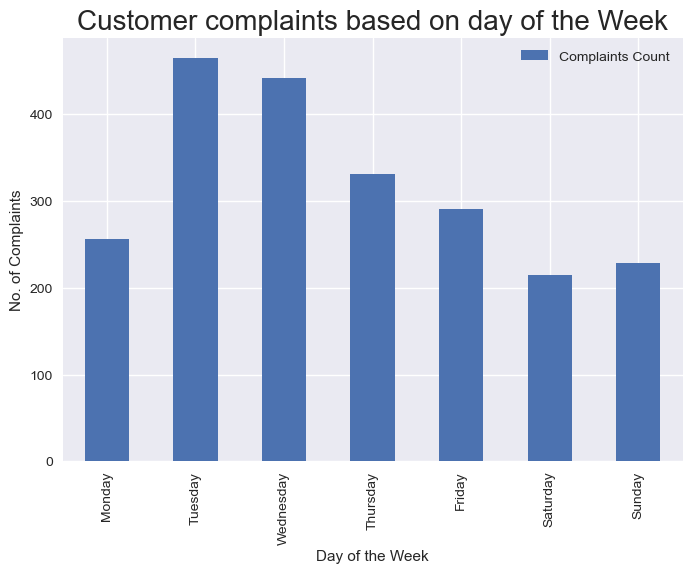

In [44]:
#Creating Trend Chart
plt.style.use('seaborn')
plt.figure(figsize=(15,8))
w.plot(kind='bar')
plt.xlabel("Day of the Week")  # add X-axis label
plt.ylabel("No. of Complaints")  # add Y-axis label
plt.title("Customer complaints based on day of the Week",fontsize=20)  # add title
plt.show()

Observation: Highest Number of Complaints were noticed on Tuesday, Wednesday and lowest on Saturday.

## Trend chart of complaints based on everyday

In [45]:
# Creating daily complaints table and arranging them in order
d = data.groupby(pd.Grouper(key='Date_month_year', freq='D')).count()['Customer Complaint'].reset_index()
d.sort_values(by ='Customer Complaint', ascending=False )
d.info()

,Date_month_year,Customer Complaint
171,2015-06-24,218
170,2015-06-23,190
172,2015-06-25,98
173,2015-06-26,55
177,2015-06-30,53
...,...,...
18,2015-01-22,0
17,2015-01-21,0
16,2015-01-20,0
15,2015-01-19,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_month_year     337 non-null    datetime64[ns]
 1   Customer Complaint  337 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


<Figure size 2500x800 with 0 Axes>

(array([16436., 16495., 16556., 16617., 16679., 16740.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16495.0, 0, '2015-03'),
  Text(16556.0, 0, '2015-05'),
  Text(16617.0, 0, '2015-07'),
  Text(16679.0, 0, '2015-09'),
  Text(16740.0, 0, '2015-11')])

(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250')])

Text(0.5, 0, 'Daily')

Text(0, 0.5, 'No. of Complaints')

Text(0.5, 1.0, 'Customer complaints occured everyday')

Text(16459.0, 150, '218 complaints on 24th June 2015')

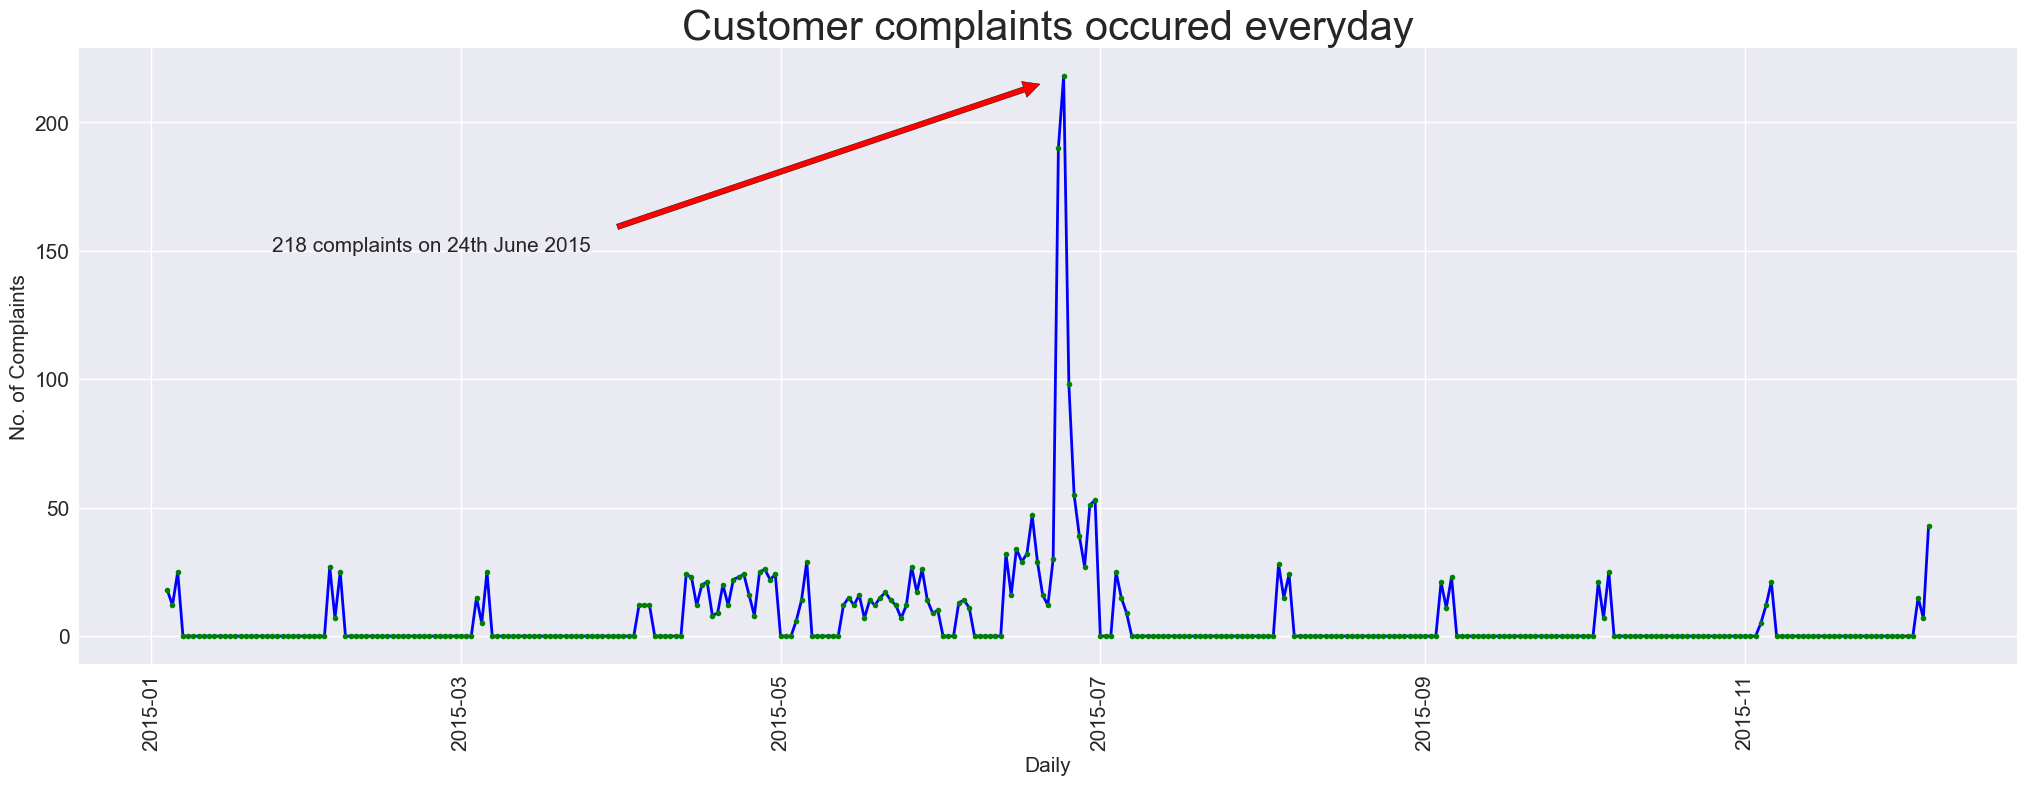

In [46]:
import matplotlib.dates as mdates
from matplotlib.ticker import Formatter
#Creating Trend Chart
plt.style.use('seaborn')
plt.figure(figsize=(25,8))
plt.plot(d['Date_month_year'],d['Customer Complaint'] , color='blue', linewidth = 2,
         markersize=4,marker ='o',markerfacecolor='green')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)
plt.xlabel("Daily",fontsize=15)  # add X-axis label
plt.ylabel("No. of Complaints",fontsize=15)  # add Y-axis label
plt.title("Customer complaints occured everyday",fontsize=30)  # add title
plt.annotate('218 complaints on 24th June 2015', xy =(mdates.date2num(dt.datetime(2015, 0o6, 24)), 218),xytext =(mdates.date2num(dt.datetime(2015, 0o1, 24)), 150),arrowprops = dict(facecolor ='red', shrink = 0.05),fontsize=15)
plt.show()

Observation: Highest Number of Complaints (218) were noticed on 24th June 2015.

# Provide a table with the frequency of complaint types.

## Creating a plot to find out frequently use words

In [47]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [48]:
#downloading Stopwords and Setting it's language to English
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\WINDOWS
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [49]:
#Instantiating wordnetlemmatizer
lemmatizer = WordNetLemmatizer() 

In [50]:
#Function to remove special characters, convert words to lowercase, spliting the words, do contraction mapping,
#remove stop words
def cleaned_complaints(text):
    newString=re.sub(r'@[A-Za-z0-9]+','',text)                     #removing user mentions
    newString=re.sub("#","",newString)                             #removing hashtag symbol
    newString= ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")]) #contraction mapping
    newString= re.sub(r'http\S+', '', newString)                   #removing links
    newString= re.sub(r"'s\b","",newString)                        #removing 's
    letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only letters
    lower_case = letters_only.lower()                              #converting all words to lowercase
    tokens = [w for w in lower_case.split() if not w in stop_words]#stopwords removal
#     tokens= lower_case.split()
    newString=''
    for i in tokens:                                                 
        newString=newString+lemmatizer.lemmatize(i)+' '            #converting words using lemmatisation                               
    return newString.strip() 

In [57]:
import nltk
nltk.download('wordnet')
cleaned_CC = []
for i in data['Customer Complaint']:
  cleaned_CC.append(cleaned_complaints(i))
print(cleaned_CC[:5]) 

[nltk_data] Downloading package wordnet to C:\Users\WINDOWS
[nltk_data]     10\AppData\Roaming\nltk_data...


True

['comcast cable internet speed', 'payment disappear service got disconnected', 'speed service', 'comcast imposed new usage cap gb punishes streaming', 'comcast working service boot']


In [58]:
data['cleaned_CC']= cleaned_CC

In [59]:
data.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date of the Month,day_of_week,cleaned_CC
Ticket #,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,Wednesday,comcast cable internet speed
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,Tuesday,payment disappear service got disconnected
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,Saturday,speed service
277946,Comcast Imposed a New Usage Cap of 300GB that punishes streaming.,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,Sunday,comcast imposed new usage cap gb punishes streaming
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,Tuesday,comcast working service boot


<Figure size 2000x800 with 0 Axes>

Text(0.5, 1.0, 'Top 50 most common words')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

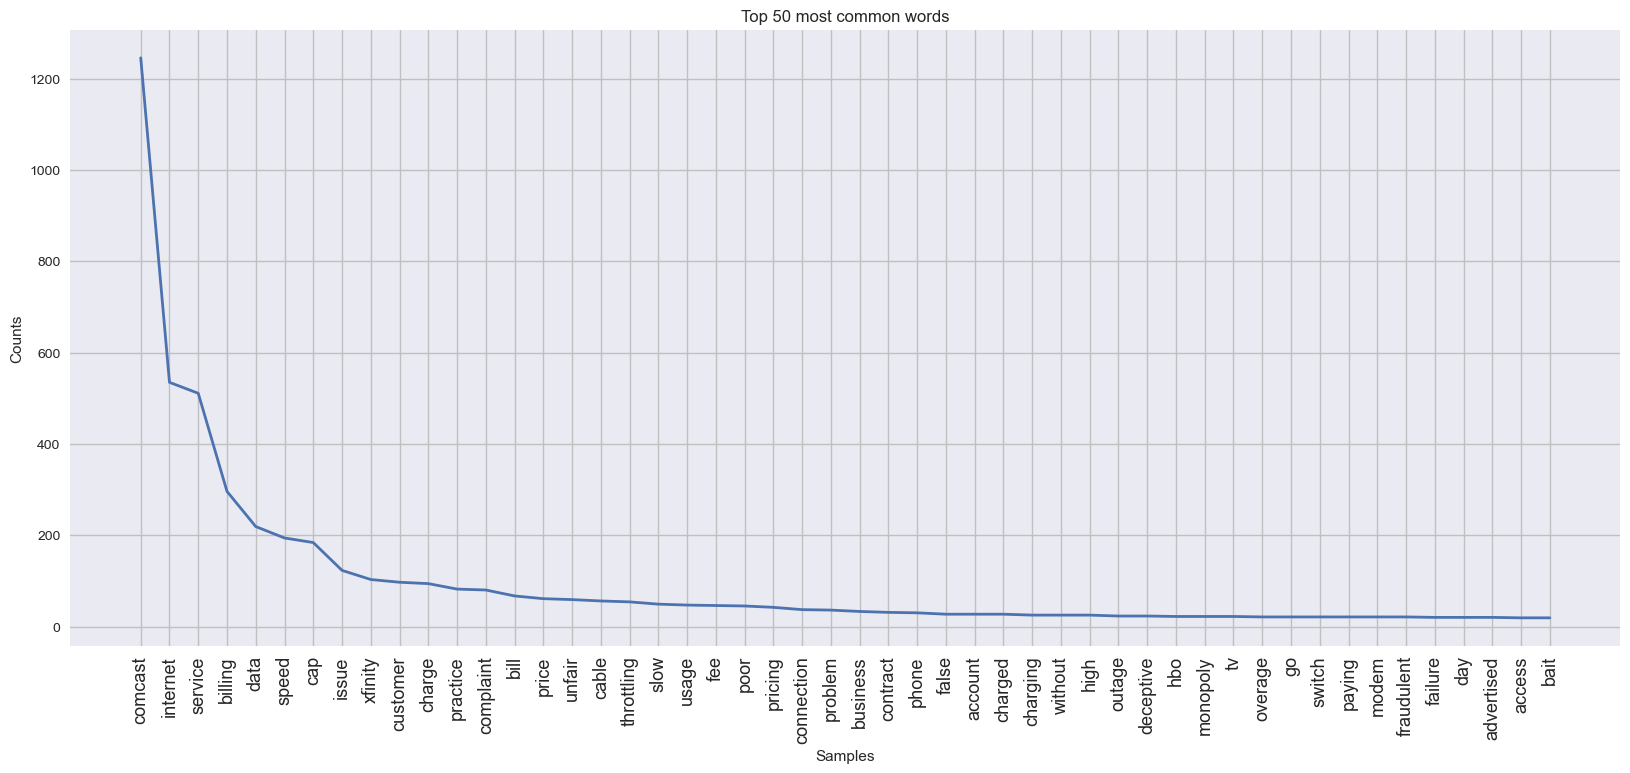

<Axes: title={'center': 'Top 50 most common words'}, xlabel='Samples', ylabel='Counts'>

In [60]:
all_words = []
for line in list(data['cleaned_CC']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(20,8))
plt.title('Top 50 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(50,cumulative=False) 

## Segregating the feedbacks into different categories based on commonly used words

In [61]:
# Create a new column to list the types of Customer Complaints
data["Complaint Category"] = np.where(data["cleaned_CC"].str.contains('Install|Internet|Speed|wifi|dns web hosting|Access|Throttling|throt|Broadband|Cable|connection|DSL|modem|ip|ISP',case=False,regex=True), 'Internet',
         np.where(data["Customer Complaint"].str.contains('Reimbursement|Price|Pricing|Cost|Payment|Charge|pay|paying|Bill|Billing|Rate|Contract|fee|unfair|refunding|refund',case=False,regex=True), 'Billing',
         np.where(data["cleaned_CC"].str.contains('slow|disconnect|slowness|Service|Cap|usage|Data|Customer|switch|wait|support|GB|TV|avail|network|cramming|practice|bandwidth|signal',case=False,regex=True), 'Network',
         np.where(data["cleaned_CC"].str.contains('complaint|breach|bully|non response|False|invalid|fed up|problem|poor|treatment|inquiries|respond|communication|refusal',case=False,regex=True), 'Service Greviances',
         np.where(data["cleaned_CC"].str.contains('email|mail',case=False,regex=True), 'Email',
         np.where(data["cleaned_CC"].str.contains('hbo |ps4|play station|HBOGO',case=False,regex=True), 'Blocking HBO',
         np.where(data["cleaned_CC"].str.contains('Monopoly|lied|monopoly|Misleading|sale|unclear policy|Monopolistic|policies|competition|Forgery|Fraud|Deceptive|deception|scam|business|advertised|Comcast|sales|Unclear policies|Xfinity|AT&T|Lies|Forgery|Advertising|Tricked',case=False,regex=True), 'Company or Marketing',
         np.where(data["cleaned_CC"].str.contains('outage',case=False,regex=True), 'Outages',
         'Other'))))))))

In [62]:
z= pd.DataFrame(data["Customer Complaint"].groupby(data["Complaint Category"]).count().sort_values(ascending=False)).reset_index()
z

,Complaint Category,Customer Complaint
0,Internet,778
1,Billing,542
2,Network,471
3,Company or Marketing,294
4,Service Greviances,62
5,Other,43
6,Blocking HBO,22
7,Email,12


<Figure size 1000x800 with 0 Axes>

<BarContainer object of 8 artists>

Text(0.5, 0, 'Complaint Category')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Internet'),
  Text(1, 0, 'Billing'),
  Text(2, 0, 'Network'),
  Text(3, 0, 'Company or Marketing'),
  Text(4, 0, 'Service Greviances'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Blocking HBO'),
  Text(7, 0, 'Email')])

Text(0, 0.5, 'No. of Complaints')

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

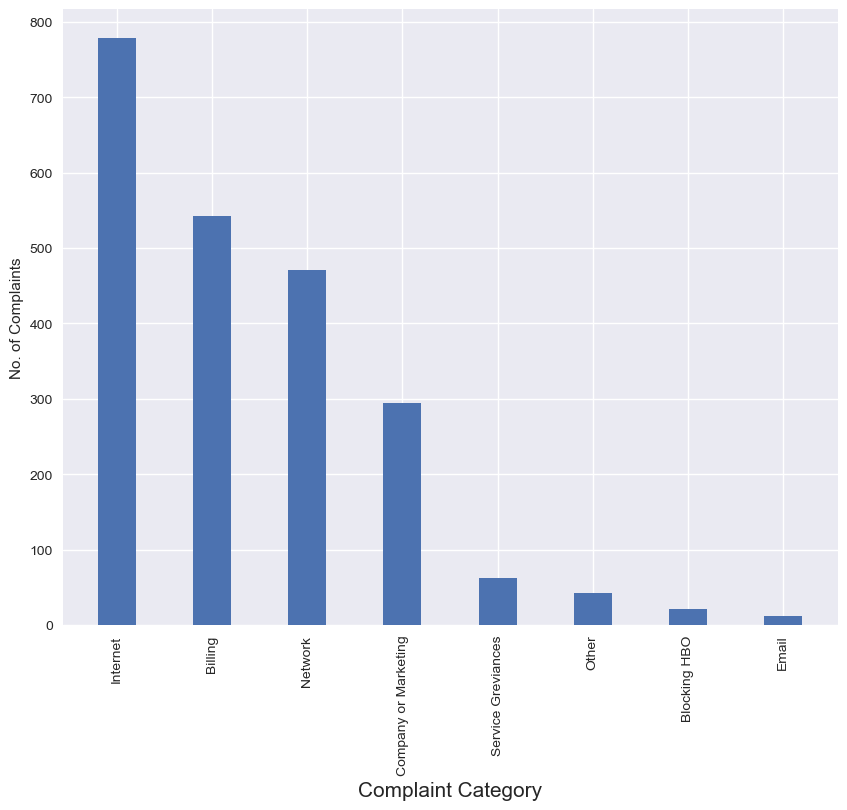

In [63]:
plt.style.use('seaborn')
plt.figure(figsize =(10, 8))
plt.bar(z["Complaint Category"],z["Customer Complaint"],
        width = 0.4)
plt.xlabel("Complaint Category",fontsize=15)
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("No. of Complaints")
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.title("Frequency of Complaints based on Category Type")

plt.show()

Observation: Internet complaints are most commonly observed complaints at Comcast Telecom Services.

In [66]:
#Installing wordcloud

In [67]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## Word Cloud for visualisation of Top Keywords used by customers

<Figure size 1200x800 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

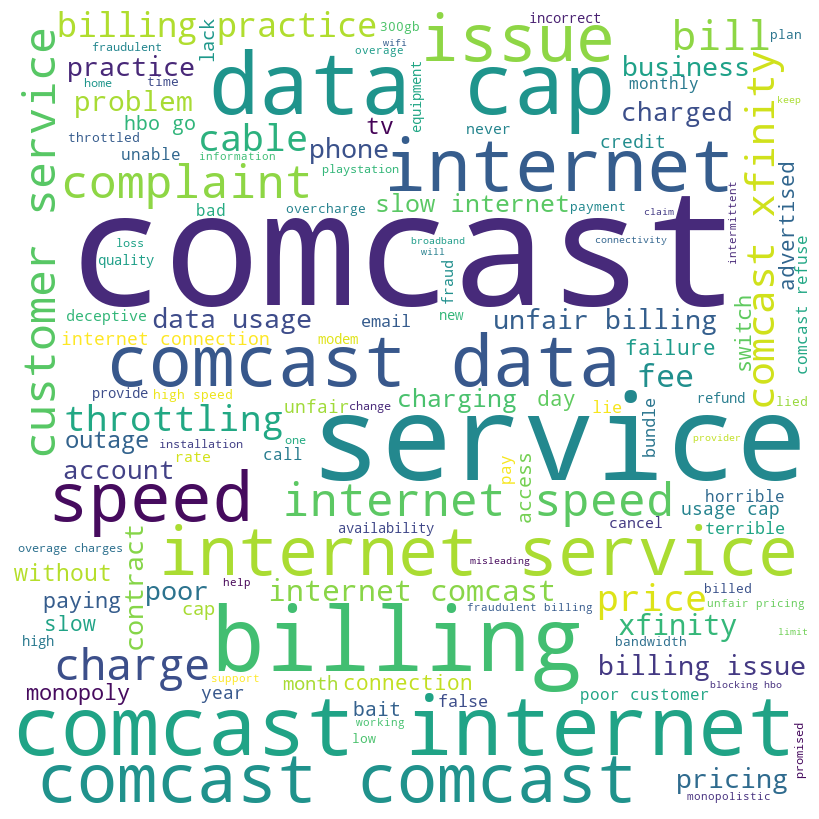

In [68]:
#Creating Word Cloud
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data['Customer Complaint']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image 
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##  Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [69]:
#Creating a function which returns open for open & pending cases and returns closed for closed and solved cases
def new_status(col):
    if col == "Open":
        val = "Open"
    elif col == "Pending":
        val = "Open"
    elif col == "Solved":
        val = "Closed"  
    else:
        val = "Closed"
    return val

In [70]:
data['New Status'] = data['Status'].apply(new_status)

In [71]:
n= data['New Status'].value_counts()
n

Closed    1707
Open       517
Name: New Status, dtype: int64

In [72]:
data['Status'].value_counts() 

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

Sum of solved & closed = 973+734 = 1707, sum of Open & Pending = 363+154 = 517. Values are matching hence the answers are correct.

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Status Type')

Text(0, 0.5, 'No. of Complaints')

Text(0.5, 1.0, 'Customer complaints based on status Type')

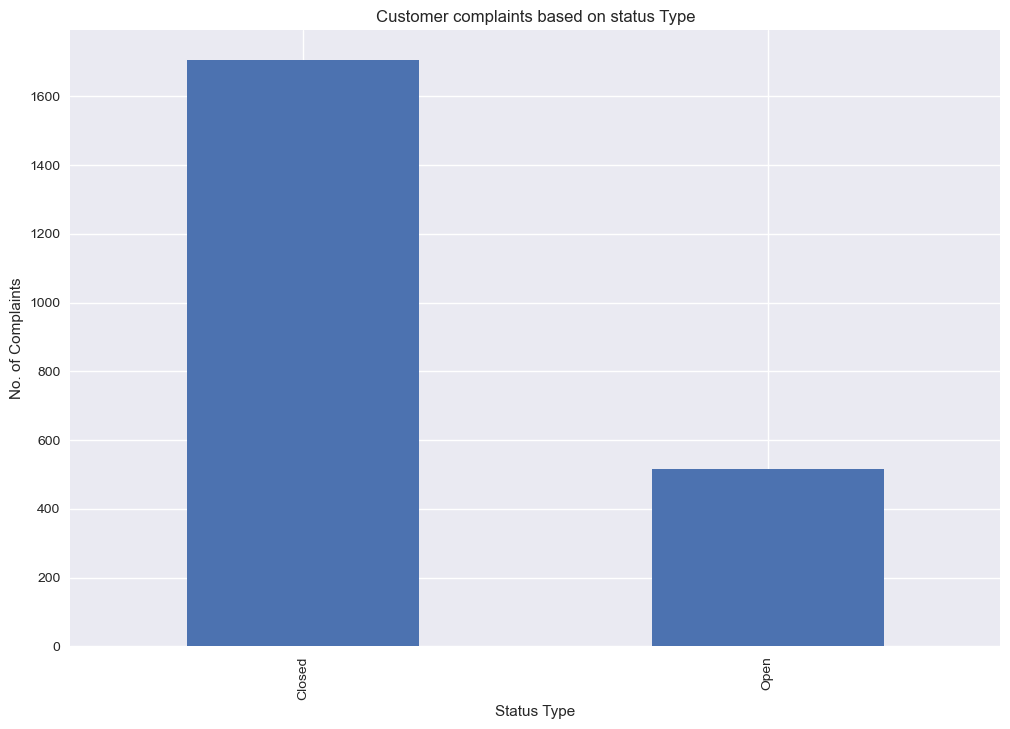

In [73]:
#Plotting the data
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
n.plot(kind='bar')
plt.xlabel("Status Type")  # add X-axis label
plt.ylabel("No. of Complaints")  # add Y-axis label
plt.title("Customer complaints based on status Type")  # add title
plt.show()

Observation: 1707 complaints are closed and 517 are open based on New Status.

### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
### Which state has the maximum complaints.
### Which state has the highest percentage of unresolved complaints.
### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

## Which State has maximum Complaints?

In [74]:
#Found the State with highest complaints
data['New Status'].groupby(data['State']).count().sort_values(ascending=False).head(1)

State
Georgia    288
Name: New Status, dtype: int64

Text(0.5, 0, 'State')

Text(0, 0.5, 'No. of complaints')

Text(0.5, 1.0, 'No. of Complaints based on State')

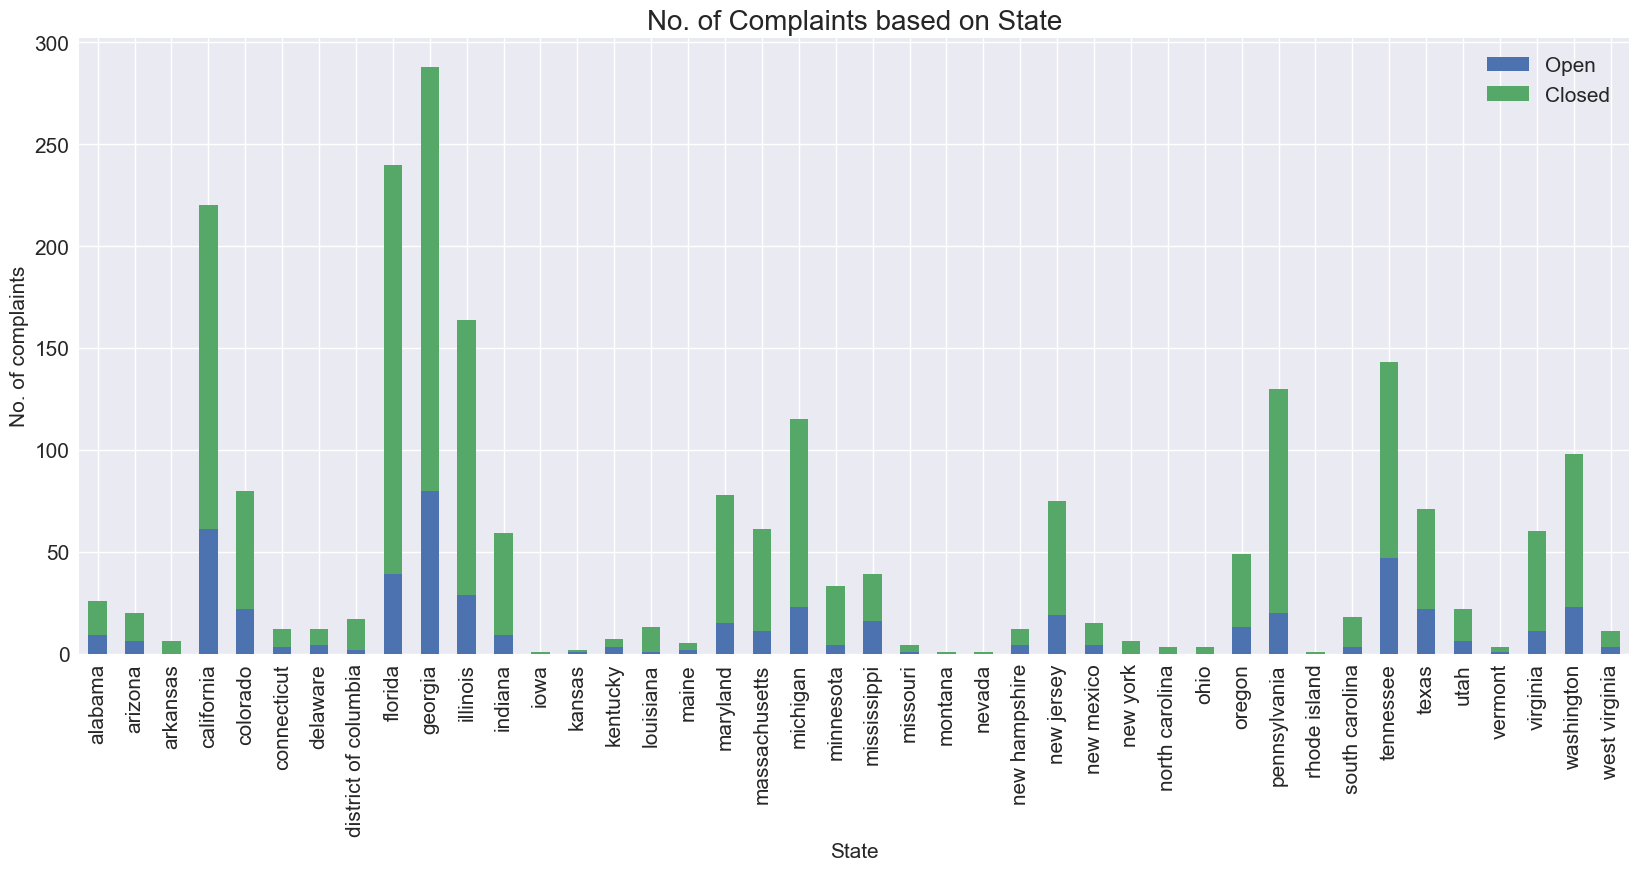

In [75]:
#Creating Stacked bar chart using New Status Created
data["State"]= data["State"].str.lower() #District of colombia is in different formats
state_chart = data.groupby(['State', 'New Status'])['State'].count().unstack('New Status').fillna(0)
ab = state_chart[['Open','Closed']].plot(kind='bar', stacked=True,rot=90,figsize=(20,8),fontsize=15)
ab.set_xlabel("State",fontsize=15)
ab.set_ylabel("No. of complaints",fontsize=15)
ab.set_title("No. of Complaints based on State",fontsize=20)
ab.legend(labels=['Open','Closed'],fontsize=15)

Observation: Georgia has highest number of Complaints.

## Which state has the highest percentage of unresolved complaints?

In [76]:
#Creating complaints data count state wise
data_statewise = data['New Status'].groupby(data['State']).count()

In [77]:
#Creating open complaints data count state wise
open_status_data = data[(data['New Status'] == "Open")]
open_data_statewise =open_status_data['New Status'].groupby(data['State']).count()

In [78]:
#Creating closed complaints data count state wise
closed_status_data = data[(data['New Status'] == "Closed")]
closed_data_statewise = closed_status_data['New Status'].groupby(data['State']).count()

In [79]:
#merging all the tables
statewise_merge_data = pd.merge((pd.merge(data_statewise,open_data_statewise,left_index = True,right_index=True)), 
closed_data_statewise,left_index = True,right_index=True)

In [80]:
#Changing column names
statewise_merge_data.rename({'New Status_x': 'Total_complaints', 
'New Status_y': 'Open_complaints','New Status': 'Closed_complaints'}, axis=1, inplace=True)

In [81]:
#Creating a new column unresolved complaints
statewise_merge_data['UnResolved_Complaints_Percentage'] = 100*(statewise_merge_data['Open_complaints'] 
/ statewise_merge_data['Total_complaints'])

In [82]:
# Extracting the State that has the highest percentage of unresolved complaints
statewise_merge_data['UnResolved_Complaints_Percentage'].sort_values(ascending = False).head(1)

State
kansas    50.0
Name: UnResolved_Complaints_Percentage, dtype: float64

In [83]:
#Top 5 unresolved complaints
statewise_merge_data.sort_values(by ='UnResolved_Complaints_Percentage', ascending=False ).head()


,Total_complaints,Open_complaints,Closed_complaints,UnResolved_Complaints_Percentage
State,,,,
kansas,2,1,1,50.000000
kentucky,7,3,4,42.857143
mississippi,39,16,23,41.025641
maine,5,2,3,40.000000
alabama,26,9,17,34.615385


In [84]:
statewise_merge_data.index

Index(['alabama', 'arizona', 'california', 'colorado', 'connecticut',
       'delaware', 'district of columbia', 'florida', 'georgia', 'illinois',
       'indiana', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri',
       'new hampshire', 'new jersey', 'new mexico', 'oregon', 'pennsylvania',
       'south carolina', 'tennessee', 'texas', 'utah', 'vermont', 'virginia',
       'washington', 'west virginia'],
      dtype='object', name='State')

<Figure size 2500x800 with 0 Axes>

<BarContainer object of 34 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'alabama'),
  Text(1, 0, 'arizona'),
  Text(2, 0, 'california'),
  Text(3, 0, 'colorado'),
  Text(4, 0, 'connecticut'),
  Text(5, 0, 'delaware'),
  Text(6, 0, 'district of columbia'),
  Text(7, 0, 'florida'),
  Text(8, 0, 'georgia'),
  Text(9, 0, 'illinois'),
  Text(10, 0, 'indiana'),
  Text(11, 0, 'kansas'),
  Text(12, 0, 'kentucky'),
  Text(13, 0, 'louisiana'),
  Text(14, 0, 'maine'),
  Text(15, 0, 'maryland'),
  Text(16, 0, 'massachusetts'),
  Text(17, 0, 'michigan'),
  Text(18, 0, 'minnesota'),
  Text(19, 0, 'mississippi'),
  Text(20, 0, 'missouri'),
  Text(21, 0, 'new hampshire'),
  Text(22, 0, 'new jersey'),
  Text(23, 0, 'new mexico'),
  Text(24, 0, 'oregon'),
  Text(25, 0, 'pennsylvania'),
  Text(26, 0, 'south carolina'),
  Text(27, 0, 'tennessee'),
  Text(28, 0, 'texas'),


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

Text(0.5, 0, 'Name of the State')

Text(0, 0.5, 'Percentage of Unresolved complaints')

Text(0.5, 1.0, 'Unresolved Complaints based on State')

Text(alabama, 40, 'Kansas is highest with 50% of unresolved complaints')

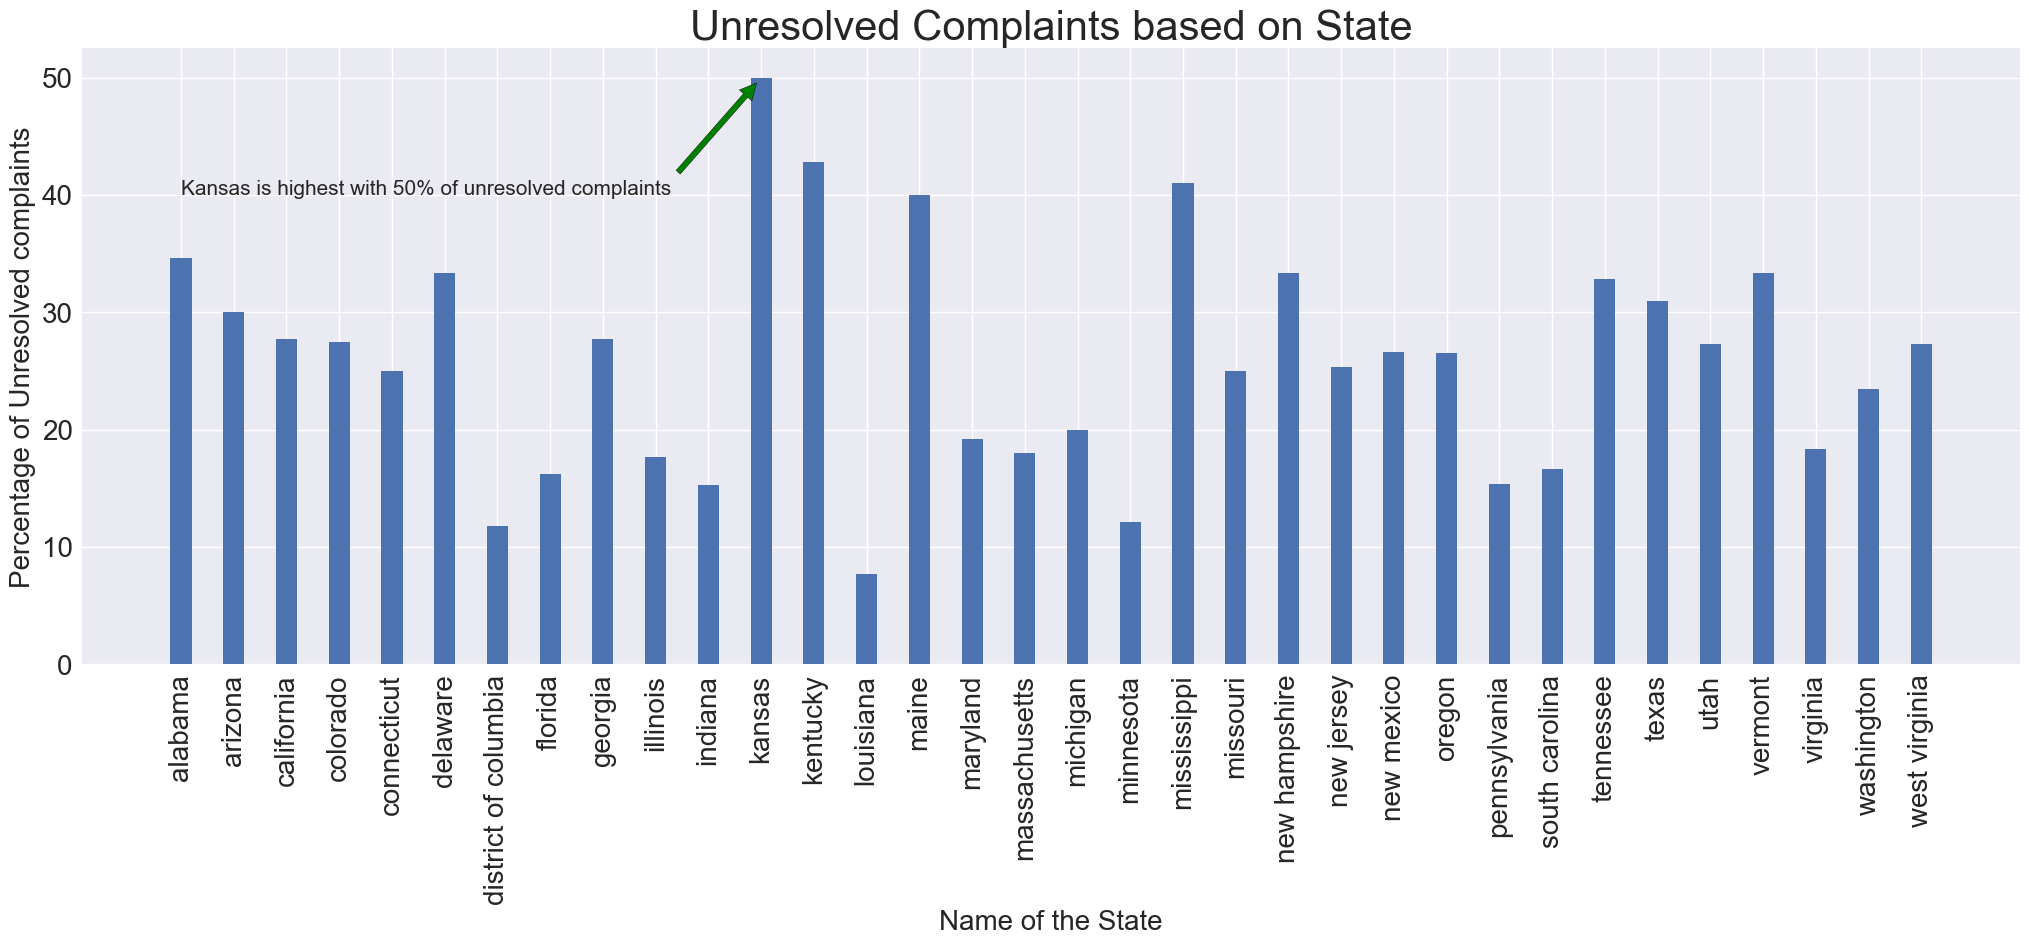

In [85]:
plt.style.use('seaborn')
plt.figure(figsize=(25,8))
plt.bar(statewise_merge_data.index, statewise_merge_data['UnResolved_Complaints_Percentage'], width = 0.4)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.xlabel("Name of the State",fontsize=20)
plt.ylabel("Percentage of Unresolved complaints",fontsize=20)
plt.title("Unresolved Complaints based on State",fontsize=30)
plt.annotate('Kansas is highest with 50% of unresolved complaints', 
xy =('kansas', 50),xytext =('alabama', 40),arrowprops = dict(facecolor ='green', shrink = 0.05),fontsize =15)
plt.show()

Observation: Kansas Has the highest number of Unresolved complaints whereas Louisiana has the lowest number of unresolved complaints.

## Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

### Percentage of Resolved complaints in each channel type

In [86]:
#Creating Stacked bar chart table using New Status Created
state_chart = data.groupby(['Received Via', 'New Status'])['Received Via'].count().unstack('New Status').fillna(0)

#Creating Closed Percentage column
state_chart['Closed Percentage'] = 100*(state_chart['Closed'] / (state_chart['Closed']+state_chart['Open']))

#Creating Open Percentage
state_chart['Open Percentage'] = 100*(state_chart['Open'] / (state_chart['Closed']+state_chart['Open']))

#required table
state_chart[['Closed Percentage','Open Percentage']]

New Status,Closed Percentage,Open Percentage
Received Via,,
Customer Care Call,77.211796,22.788204
Internet,76.289593,23.710407


Text(0.5, 0, 'Mode of communication of the complaint')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Percentage of Resolved Complaints')

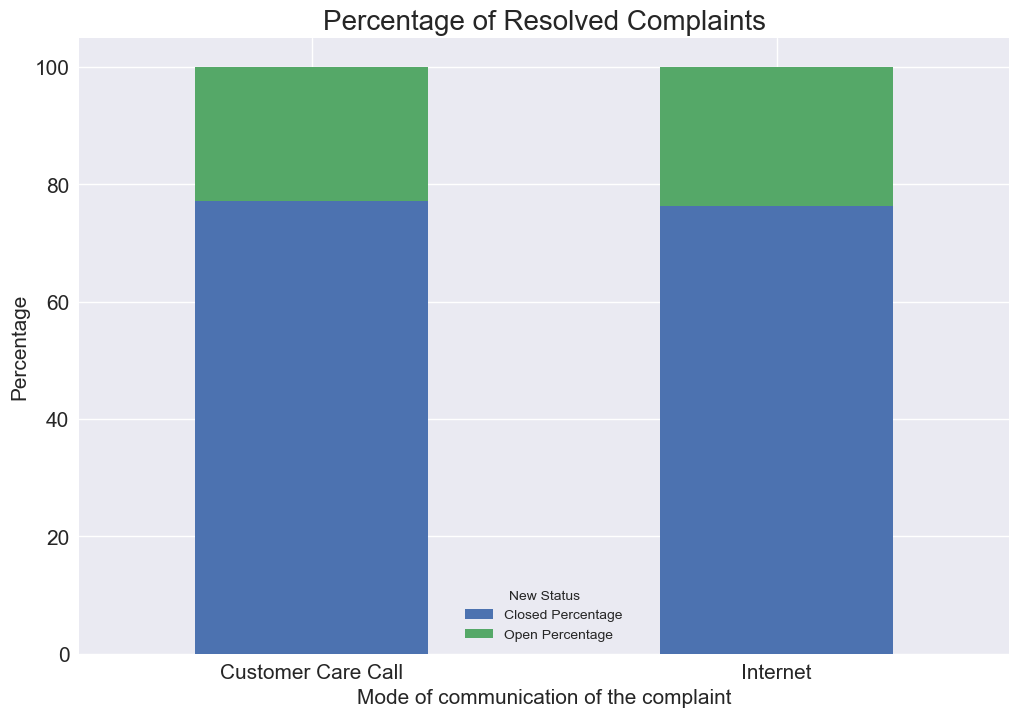

In [87]:
#Plotting the graph
ax = state_chart[['Closed Percentage','Open Percentage']].plot(kind='bar', stacked=True,rot=0,figsize=(12,8),fontsize=15)
ax.set_xlabel("Mode of communication of the complaint",fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.set_title("Percentage of Resolved Complaints",fontsize=20)

Observation: Percentage of Resolved complaints remained almost same based on Mode of communication of the complaint. But slightly, Customer care calls are more resolved than Internet calls.

## Total Percentage of Resolved complaints based on channel type

In [88]:
#Creating Stacked bar chart table using New Status Created
state_chart1 = data.groupby(['Received Via', 'New Status'])['Received Via'].count().unstack('New Status').fillna(0)

#Percentage of Resolved complaints based on channel
state_chart1['Resolved Complaints'] = (state_chart1['Closed'] / state_chart1['Closed'].sum()) * 100

#Percentage of Unresolved complaints based on channel
state_chart1['Unresolved Complaints'] = (state_chart1['Open'] / state_chart1['Open'].sum()) * 100

In [89]:
data.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date of the Month,day_of_week,cleaned_CC,Complaint Category,New Status
Ticket #,,,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,maryland,21009,Closed,No,22,Wednesday,comcast cable internet speed,Internet,Closed
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,georgia,30102,Closed,No,4,Tuesday,payment disappear service got disconnected,Billing,Closed
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,georgia,30101,Closed,Yes,18,Saturday,speed service,Internet,Closed
277946,Comcast Imposed a New Usage Cap of 300GB that punishes streaming.,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,georgia,30101,Open,Yes,5,Sunday,comcast imposed new usage cap gb punishes streaming,Network,Open
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,georgia,30101,Solved,No,26,Tuesday,comcast working service boot,Network,Closed


In [90]:
a = data.pivot_table(values='Customer Complaint',index=['Received Via'],columns=['New Status'],
 aggfunc = 'count',margins= True)
a

New Status,Closed,Open,All
Received Via,,,
Customer Care Call,864,255,1119
Internet,843,262,1105
All,1707,517,2224


In [91]:
state_chart1

New Status,Closed,Open,Resolved Complaints,Unresolved Complaints
Received Via,,,,
Customer Care Call,864,255,50.615114,49.323017
Internet,843,262,49.384886,50.676983


([<matplotlib.patches.Wedge at 0x2195f23d0d0>,
 [Text(-0.02222164861319878, 1.1497852835781608, 'Customer Care Call(50.62%)'),
  Text(0.02125538700763901, -1.0997946210648402, 'Internet(49.38)')])

Text(0.5, 1.0, 'Percentage of resolved complaints based on channel type')

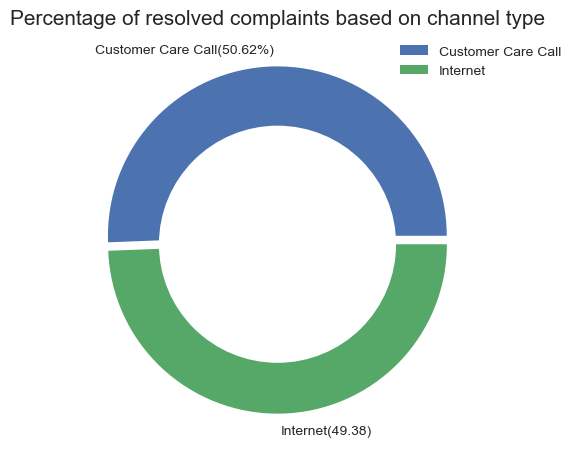

In [92]:
plt.pie(state_chart1['Resolved Complaints'], 
labels = ['Customer Care Call(50.62%)','Internet(49.38)'], explode = (0.05,0), pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white') # draw circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Adding Circle in Pie chart
plt.legend(labels=['Customer Care Call','Internet'], bbox_to_anchor=(1.2,1),loc="upper right")
plt.title("Percentage of resolved complaints based on channel type", fontsize =15)

plt.show()

# Customer care call complaints are slightly more resolved than Internet Complaints.